# Assignment 2

 ## Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,Normalizer
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


## Read Data

In [2]:
data=pd.read_csv("bank-full.csv",sep = ';' )
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Describe Data¶ 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Checking Null Values and their numbers in each column

In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Thereis no nulls , and that so good 

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Label Encoding

### Encoidng data in our dataframe

In [6]:
encs = {}
for col in data.columns:
    if data[col].dtype == "object":
        if col=="job": # make OneHotEncoder for job colunm because it has more than 10 classes
            encs[col]=OneHotEncoder()
            data[col]=encs[col].fit_transform(data[col].values.reshape(-1,1)).toarray()
        else:
            encs[col] = LabelEncoder()
            data[col]   =encs[col].fit_transform(data[col])
       
        


In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,0.0,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,0.0,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,0.0,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,0.0,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,0.0,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,0.0,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,0.0,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,0.0,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,0.0,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


# Scale data 

In [8]:
encs = {}
for col in data.columns:
    if data[col].dtype == "int64":
        encs[col] =StandardScaler()
        data[col] =encs[col].fit_transform(data[col].values.reshape(-1,1))
        
data        

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,0.0,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.251940,3,0
1,0.288529,0.0,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.251940,3,0
2,-0.747384,0.0,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.251940,3,0
3,0.571051,0.0,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.251940,3,0
4,-0.747384,0.0,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.251940,3,0
5,-0.559037,0.0,1,2,0,-0.371551,1,0,2,-1.298476,8,-0.462724,-0.569351,-0.411453,-0.251940,3,0
6,-1.218254,0.0,2,2,0,-0.300608,1,1,2,-1.298476,8,-0.159841,-0.569351,-0.411453,-0.251940,3,0
7,0.100181,0.0,0,2,1,-0.446762,1,0,2,-1.298476,8,0.473107,-0.569351,-0.411453,-0.251940,3,0
8,1.606965,0.0,1,0,0,-0.407679,1,0,2,-1.298476,8,-0.808322,-0.569351,-0.411453,-0.251940,3,0
9,0.194355,0.0,2,1,0,-0.252657,1,0,2,-1.298476,8,-0.788906,-0.569351,-0.411453,-0.251940,3,0


In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,0.0,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,0.0,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,0.0,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,0.0,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,0.0,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


## correlation map

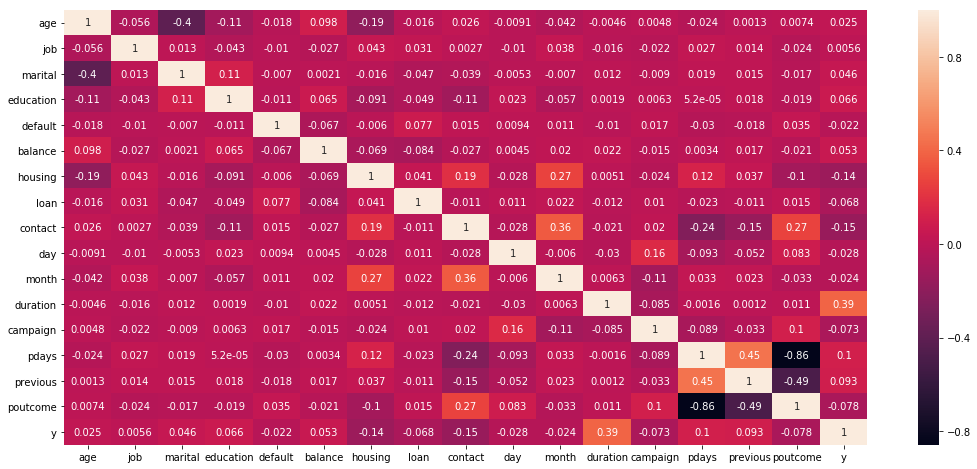

In [10]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True);

In [11]:
X = data.iloc[:, 0:16].values
y = data.iloc[:, 16].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##  Decision Tree

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8721663164878912


In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7363,  617],
       [ 539,  524]], dtype=int64)

In [16]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [17]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [18]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = data[0:18].columns.values,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

##  I will change the parmeters of  decision tree  to enhance the accuracy  

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.883777507464337


In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7751,  229],
       [ 822,  241]], dtype=int64)

## Random Forests

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train2,y_train2)
# prediction on test set
y_pred2=clf2.predict(X_test2)

In [23]:
# Model Accuracy, how often is the classifier correct?
base_accuracy=metrics.accuracy_score(y_test2, y_pred2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.900807254229791


In [24]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train2, y_train2)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min


In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train2, y_train2)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))